<a href="https://colab.research.google.com/github/juccaicedoac03/Kernel_Renyi_Entropy/blob/master/entropies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
FILEID = "1Hmq-Lu-RAd8a6jqDhaXMsXlADdhBl7FA"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-04-27 22:29:03--  https://docs.google.com/uc?export=download&confirm=&id=1Hmq-Lu-RAd8a6jqDhaXMsXlADdhBl7FA
Resolving docs.google.com (docs.google.com)... 173.194.79.102, 173.194.79.100, 173.194.79.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1Hmq-Lu-RAd8a6jqDhaXMsXlADdhBl7FA&followup=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1Hmq-Lu-RAd8a6jqDhaXMsXlADdhBl7FA&ltmpl=homepage [following]
--2020-04-27 22:29:04--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1Hmq-Lu-RAd8a6jqDhaXMsXlADdhBl7FA&followup=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1Hmq-Lu-RAd8a6jqDhaXMsXlADdhBl7FA&ltmpl=homepage
Resolv

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Entropy_V2/')

#ITL from Kernel matrices

Shannon entropy is defined as the expected value of the amount of information of the outcomes of a random variable:

>$H(x)=E\{I(x)\} = \int p(x)I(x)dx$,

>Were $I(x) = -\log p(x)$ and $\int p(x)=1$

In general, the expected value associed with a monotonic function $g(x)$ with inverse $g(x)^{-1}$:

>$E\{x\} = g^{-1}\left(\int p(x)g(x)dx\right)$

$g(x)$ are restricted to only 2 classes [Panche et al. 2019]: $g(x) = cx$ and $c2^{(1-\alpha)x}$ for both Shannon $H_{s}(\cdot)$ and Renyi $H_{\alpha}(\cdot)$ entropy, respectively.

>$H_{s}(x) = -\int p(x)\log{p(x)}dx$

>$H_{\alpha}(x) = \frac{1}{1-\alpha}\log{\int}p^{\alpha}(x)dx$

[Giraldo et al. 2014] introduces an entropy-like quantity with properties that closely resemble those of Renyi's entropy while avoiding the estimation of probability distributions altogether. Then, the kernel-based formulation of Renyi's entropy using a Gram matrix $A\in\mathbb{R}^{n\times n}$ with elements $a_{ij} = \kappa(x_{i},x_{j})$, is defined as:

>$H_{\alpha} = \frac{1}{1-\alpha}\log{\left(\text{tr}(A^{\alpha})\right)}$



In [0]:
import numpy as np
import numpy.matlib
from scipy.io import loadmat
import functions as fcn
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm 

In [0]:
data = loadmat('/content/drive/My Drive/Entropy_V2/Data_dummy/ventana.mat')
x = data['vector']

In [0]:
def gauss_kernel(X):
    d = dis.cdist(X,X)
    sigma = np.median(d.ravel())
    K = np.exp(-((d)**2)/(2*sigma**2))
    return K

In [0]:
def kernel_entropy(A,alpha):
    H = (1/(1-alpha)*np.log2(np.trace(np.power(np.asmatrix(A),alpha))))
    return H

In [0]:
#def KEn(x,alpha):
alpha=1.01
tau = 2

#pos = 0
#Xm = []
#while pos+tau+1<x.shape[1]:
#    Xm.append(x[:,pos:pos+tau].ravel())
#    pos = pos+tau

K = gauss_kernel(x.T)
Ke = K/np.trace(K)

H = np.real((1/(1-alpha))*np.log2(np.trace(Ke**alpha)))
print((1/(1-alpha)))

-99.99999999999991


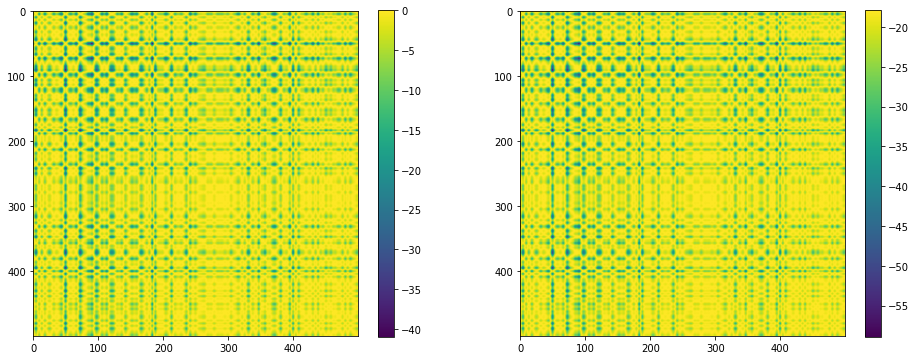

In [0]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(np.log2(K**2))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.log2(Ke**2))
plt.colorbar()
plt.show()

$f(x)_{x}$
